In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement =Base.classes.measurement

Station =Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23')

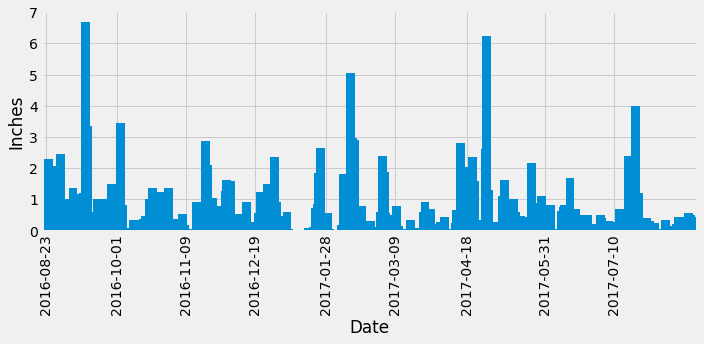

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
date_range = session.query(Measurement.date).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date.desc()).count()

# Perform a query to retrieve the data and precipitation scores
dpq = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(2230)
dpq

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(dpq, columns=['date','prcp'])
df.set_index('date',inplace=True)
df

# Sort the dataframe by date
df_gb = df.groupby('date')['prcp'].max()
df_gb

# Use Pandas Plotting with Matplotlib to plot the data
df_gb.plot.bar(figsize=(10,5),rot=90, grid=True,width=5)

plt.xlabel("Date")
plt.ylabel("Inches")
plt.yticks([0,1,2,3,4,5,6,7])
x_ticks = [0,40,79,118,158,197,238,282,321]
x_labels = ["2016-08-23", "2016-10-01", "2016-11-09", "2016-12-19", "2017-01-28", "2017-03-09","2017-04-18", "2017-05-31", "2017-07-10"]
plt.xticks(x_ticks, x_labels)

plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_gb.describe()

count    366.000000
mean       0.520765
std        0.830728
min        0.000000
25%        0.040000
50%        0.250000
75%        0.672500
max        6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.station).count()
print(f"There are {station_count} stations")

There are 9 stations


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
results = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
results
#for s in results:
   #print(results)

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(Station.name, func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

highest_temp = session.query(Station.name, func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

avg_temp = session.query(Station.name, func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f"Lowest Temp {lowest_temp}\nHighest Temp {highest_temp}\nAverage Temp {avg_temp}")

Lowest Temp [('WAIKIKI 717.2, HI US', 54.0)]
Highest Temp [('WAIKIKI 717.2, HI US', 85.0)]
Average Temp [('WAIKIKI 717.2, HI US', 71.66378066378067)]


<AxesSubplot:ylabel='Frequency'>

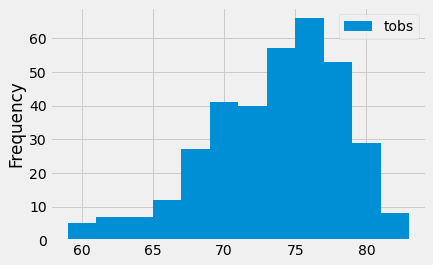

In [94]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempgraph = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= '2016-08-23', Measurement.station == 'USC00519281').all()
tempgraph_df = pd.DataFrame(tempgraph, columns = ['date','tobs'])

tempgraph_df.plot.hist(grid=True, bins=12)

# Close session

In [ ]:
# Close Session
session.close()